In [1]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

In [2]:
# Data Preparation

X = np.load('p2_unsupervised\X.npy')
# df = pd.DataFrame(X)

print(X.shape)
print(max(np.log2(X + 1)[:, 0]))

log_df = np.log2(X + 1)

(2169, 45768)
5.972169178513185


### Part 1 Visualization

In [3]:
# Problem 1

pca = PCA()
log_z = pca.fit_transform(log_df)
z_var = pca.explained_variance_ratio_

1252


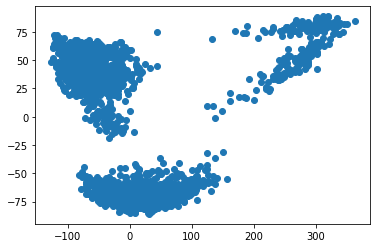

In [18]:
print(np.where(np.cumsum(z_var) > 0.85)[0][0])
plt.scatter(log_z[:, 0], log_z[:, 1])
plt.savefig("PCA-OG.pdf")
plt.show()


In [27]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50)
z_tsne = tsne.fit_transform(log_z[:, 0:20])

C:\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 2169 samples in 0.000s...
[t-SNE] Computed neighbors for 2169 samples in 0.096s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2169
[t-SNE] Computed conditional probabilities for sample 2000 / 2169
[t-SNE] Computed conditional probabilities for sample 2169 / 2169
[t-SNE] Mean sigma: 27.279061
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.559189
[t-SNE] KL divergence after 1000 iterations: 0.405059


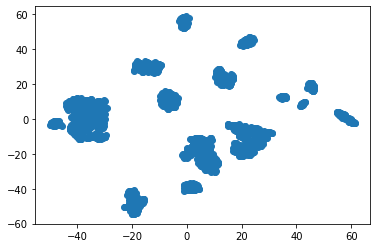

In [28]:
plt.scatter(z_tsne[:, 0], z_tsne[:, 1])
plt.savefig("Tsne-Kmeans.pdf")
plt.show()

In [7]:
mds = MDS(n_components=2, verbose=1, eps=1e-5)
mds.fit(log_df)

MDS(eps=1e-05, verbose=1)

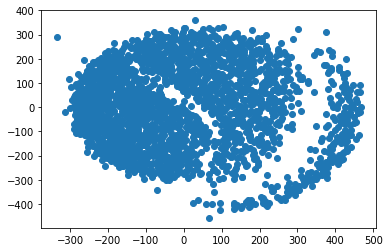

In [8]:
plt.scatter(mds.embedding_[:, 0], mds.embedding_[:, 1])
plt.show()

In [48]:
all_kmeans = [KMeans(n_clusters=i + 1, n_init=200) for i in range(14)]

for i in range(14):
    all_kmeans[i].fit(log_z[:,0:100])

inertias = [all_kmeans[i].inertia_ for i in range(14)]

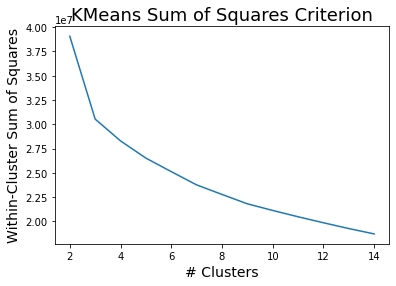

In [64]:
plt.plot(np.arange(2, 15), inertias[1:])
plt.title("KMeans Sum of Squares Criterion", size = 18)
plt.xlabel("# Clusters",size=14)
plt.ylabel("Within-Cluster Sum of Squares", size = 14)
plt.savefig("SumOSquares.pdf")
plt.show()

In [80]:
y = all_kmeans[13].fit_predict(log_z[:,0:100])

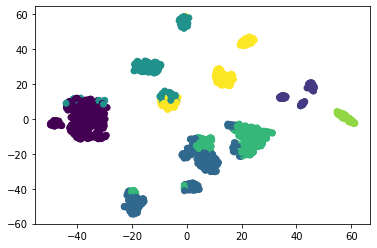

In [77]:
plt.scatter(z_tsne[:, 0], z_tsne[:, 1],c=y)
plt.savefig("Tsne-Kmeans6.pdf")
plt.show()

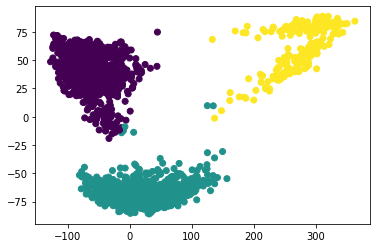

In [55]:
plt.scatter(log_z[:, 0], log_z[:, 1],c=y)
plt.savefig("PCA_Kmeans.pdf")
plt.show()

In [58]:
from sklearn.metrics import silhouette_score
avg_silhouette_scores = [silhouette_score(log_df,all_kmeans[i].labels_) for i in range(1,14)]

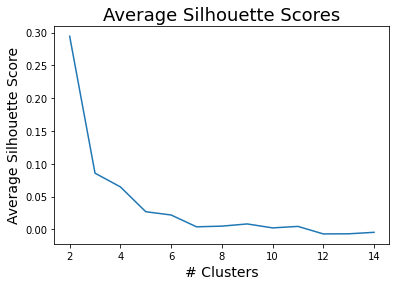

In [65]:
plt.plot(np.arange(2,15),avg_silhouette_scores)
plt.title("Average Silhouette Scores",size=18)
plt.xlabel("# Clusters",size=14)
plt.ylabel("Average Silhouette Score",size=14)
plt.savefig("AvgScore.pdf")
plt.show()

In [92]:
#from sklearn.metrics import silhouette_score
#plt.plot(np.arange(2,6),[silhouette_score(log_df,KMeans(i,n_init=200).fit(log_df).label_) for i in range(6)])

#plt.title("Average Silhouette Scores",size=18)
#plt.xlabel("# Clusters",size=14)
#plt.ylabel("Average Silhouette Score",size=14)
#plt.show()

In [ ]:
#from yellowbrick.cluster import SilhouetteVisualizer
#from yellowbrick.style import rcmod
#from yellowbrick.style.colors import resolve_colors

#visualizers = [SilhouetteVisualizer(all_kmeans[i], colors='yellowbrick',is_fitted=True) for i in range(1,8)]

#for i in range(7):
#    fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(10,4))
#    visualizer = SilhouetteVisualizer(all_kmeans[i+1], colors='yellowbrick',is_fitted=True,ax=ax1)
#    visualizer.fit(log_df)
    
#    colors = np.array(resolve_colors(i+2,"yellowbrick"))
#    ax2.scatter(log_z[:,0],log_z[:,1],c=colors[all_kmeans[i+1].labels_])
#    ax2.axis("equal")

# If we want to set axes to be the same for all plots, need to do something like this
# instead of visualizer.show(), which resets the axes
#    visualizer.finalize()
#    ax1.set_xlim((-.4,.8))
#    plt.show()

In [78]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

In [108]:
#X_R = np.load('p2_unsupervised_reduced\X.npy')
#log_X_R = np.log2(X_R + 1)

#pca = PCA()
#log_z_R = pca.fit_transform(log_X_R)

#kmeans = KMeans(n_clusters=14, n_init=200).fit(log_z_R)

#y = kmeans.fit_predict(log_z_R)

In [83]:
np.random.seed(2022)
perm = np.random.permutation(log_df.shape[0])
n_train = int(4/5*log_df.shape[0])
print(n_train)
X_train = log_df[perm[:n_train]]
X_test = log_df[perm[n_train:]]
Y_train = y[perm[:n_train]]
Y_test = y[perm[n_train:]]

1735


In [109]:
log_reg = LogisticRegression(penalty = "none", multi_class = "ovr").fit(X_train,Y_train)

In [110]:
log_reg.score(X_train,Y_train)

1.0

In [111]:
log_reg.score(X_test,Y_test)

0.9769585253456221

In [112]:
log_reg = LogisticRegressionCV(cv=3,Cs=[0.01,0.1,1],max_iter=1000,penalty="l2", multi_class = "ovr")
log_reg.fit(X_train,Y_train)
log_reg.score(X_train,Y_train)

1.0

In [113]:
log_reg.C_

array([0.1 , 0.01, 0.01, 1.  , 1.  , 0.01, 1.  , 0.01, 0.01, 1.  , 0.01,
       0.01, 0.01, 0.01])

In [114]:
log_reg.scores_

{0: array([[0.97063903, 0.97063903, 0.97236615],
        [0.97750865, 0.97577855, 0.97231834],
        [0.96885813, 0.97058824, 0.96712803]]),
 1: array([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]),
 2: array([[0.99827288, 0.99827288, 0.99827288],
        [0.99307958, 0.99307958, 0.99307958],
        [1.        , 1.        , 1.        ]]),
 3: array([[0.97927461, 0.97927461, 0.98100173],
        [0.97750865, 0.97923875, 0.98096886],
        [0.98096886, 0.98096886, 0.98096886]]),
 4: array([[0.99827288, 0.99827288, 1.        ],
        [0.99307958, 0.99307958, 0.99307958],
        [0.99307958, 0.99480969, 0.99480969]]),
 5: array([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]),
 6: array([[0.97582038, 0.9775475 , 0.9775475 ],
        [0.97231834, 0.97231834, 0.97404844],
        [0.98615917, 0.98615917, 0.98615917]]),
 7: array([[0.97927461, 0.9775475 , 0.9775475 ],
        [0.98096886, 0.97923875, 0.97404844],
        [0.98961938, 0.98961938, 0.98788927]]),


In [115]:
log_reg.score(X_test,Y_test)

0.9631336405529954

In [116]:
coefs = np.sum(np.abs(log_reg.coef_),axis=0)

ind = (-coefs).argsort()[:100]
print(ind)

[ 4356 31421  7473 36985  4688 42610  5849 40043  5523 42749 38398 38286
 24590 31889 40045 31595 34789 25442 45653  2770 41265 25448 37469 25499
 24302 34403  4509  5551 38846 36788 45169  6951 38467 41728 41385  4498
  4829 44937 42363 34890 38865  2549 34517 36986 32327  5752  5741  8468
 41860 23379  7897  4331 41846  6648  5602  8511  5809  2603  5252  8586
  6626 39709 24523 39806 34527 38551 34592 36780 24336 40611  8571 38705
 37468  7394  6042  3496  8001  8612 23399 33730 39736  5838 23433  4439
  7651 25514  8196 39723  8253  7862  5866 36887 34456 36823  5273  8589
 25654 32109  7643 44930]


In [99]:
log_reg_1 = LogisticRegressionCV(cv=3,Cs=[0.01,0.1,1,10],max_iter=2000,penalty="l2", multi_class = "ovr")
log_reg_1.fit(X_train[:,ind],Y_train)

LogisticRegressionCV(Cs=[0.01, 0.1, 1, 10], cv=3, max_iter=2000,
                     multi_class='ovr')

In [117]:
log_reg_1.score(X_train[:,ind],Y_train)
log_reg_1.score(X_test[:,ind],Y_test)

NameError: name 'log_reg_1' is not defined

In [139]:
X_tr = np.load('p2_evaluation\X_train.npy')
X_tst = np.load('p2_evaluation\X_test.npy')
y_tr = np.load('p2_evaluation\y_train.npy')
y_tst = np.load('p2_evaluation\y_test.npy')

X_tr = np.log2(X_tr + 1)
X_tst = np.log2(X_tst + 1)

In [152]:
log_reg_1 = LogisticRegressionCV(cv=3,Cs=[0.01,0.1,1,10],max_iter=2000,penalty="l2", multi_class = "ovr")
log_reg_1.fit(X_tr[:,ind],y_tr)

LogisticRegressionCV(Cs=[0.01, 0.1, 1, 10], cv=3, max_iter=2000,
                     multi_class='ovr')

In [154]:
log_reg_1.score(X_tr[:,ind],y_tr)
#log_reg_1.score(X_tst[:,ind],y_tst)

1.0

In [142]:
np.random.seed(2022)
rand = np.random.randint(0,X_tr.shape[0],100)
print(rand)

[ 893  173  624  240  951   18   24  144  809  801   11  147  862 1000
  459   48  147  166  840  910  861  272   97  898  501  527  855  498
  378  211   12  301  753   90  910  269  333 1076  704  791   37  533
  440  511  203 1003   46  633  996  686  809  360  829  859  738   23
  370  945  439 1052  230  154  263  621   62  356  347  460  508  756
  744  855   76  309   62  663  890   24  576 1014  728  488   19  689
  187  474  438  139  557  707   44  762  599  419  610  646  129  249
  562  930]


In [143]:
log_reg_2 = LogisticRegressionCV(cv=3,Cs=[0.01,0.1,1,10],max_iter=2000,penalty="l2", multi_class = "ovr")
log_reg_2.fit(X_tr[:,rand],y_tr)


0.38898916967509023

In [149]:
log_reg_2.score(X_tr[:,rand],y_tr)
#log_reg_2.score(X_tst[:,rand],y_tst)

0.5543175487465181

In [144]:
std = np.std(X_tr,axis = 0)
ind_std = (-coefs).argsort()[:100]
print(ind_std)

[ 4356 31421  7473 36985  4688 42610  5849 40043  5523 42749 38398 38286
 24590 31889 40045 31595 34789 25442 45653  2770 41265 25448 37469 25499
 24302 34403  4509  5551 38846 36788 45169  6951 38467 41728 41385  4498
  4829 44937 42363 34890 38865  2549 34517 36986 32327  5752  5741  8468
 41860 23379  7897  4331 41846  6648  5602  8511  5809  2603  5252  8586
  6626 39709 24523 39806 34527 38551 34592 36780 24336 40611  8571 38705
 37468  7394  6042  3496  8001  8612 23399 33730 39736  5838 23433  4439
  7651 25514  8196 39723  8253  7862  5866 36887 34456 36823  5273  8589
 25654 32109  7643 44930]


In [145]:
log_reg_3 = LogisticRegressionCV(cv=3,Cs=[0.01,0.1,1,10],max_iter=2000,penalty="l2", multi_class = "ovr")
log_reg_3.fit(X_tr[:,ind_std],y_tr)


0.924187725631769

In [151]:
log_reg_3.score(X_tr[:,ind_std],y_tr)
#log_reg_3.score(X_tst[:,ind_std],y_tst)


1.0

In [155]:
print(ind)
print(ind_std)
print(rand)

[ 4356 31421  7473 36985  4688 42610  5849 40043  5523 42749 38398 38286
 24590 31889 40045 31595 34789 25442 45653  2770 41265 25448 37469 25499
 24302 34403  4509  5551 38846 36788 45169  6951 38467 41728 41385  4498
  4829 44937 42363 34890 38865  2549 34517 36986 32327  5752  5741  8468
 41860 23379  7897  4331 41846  6648  5602  8511  5809  2603  5252  8586
  6626 39709 24523 39806 34527 38551 34592 36780 24336 40611  8571 38705
 37468  7394  6042  3496  8001  8612 23399 33730 39736  5838 23433  4439
  7651 25514  8196 39723  8253  7862  5866 36887 34456 36823  5273  8589
 25654 32109  7643 44930]
[ 4356 31421  7473 36985  4688 42610  5849 40043  5523 42749 38398 38286
 24590 31889 40045 31595 34789 25442 45653  2770 41265 25448 37469 25499
 24302 34403  4509  5551 38846 36788 45169  6951 38467 41728 41385  4498
  4829 44937 42363 34890 38865  2549 34517 36986 32327  5752  5741  8468
 41860 23379  7897  4331 41846  6648  5602  8511  5809  2603  5252  8586
  6626 39709 24523 39806 

AttributeError: 'Rectangle' object has no property 'nbins'

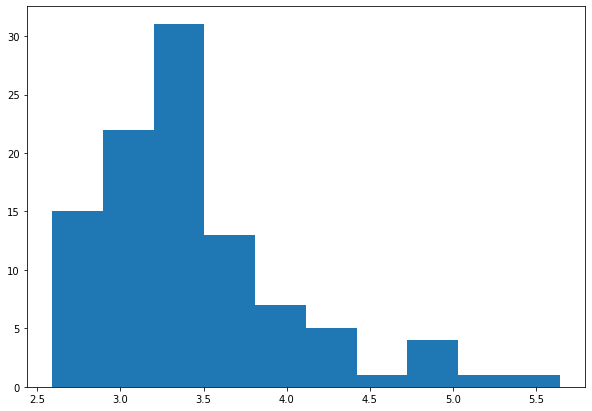

In [157]:
max_std = np.std(X_tr[:,ind_std],axis = 0)
kmeans_std = np.std(X_tr[:,ind],axis = 0)
rand_std = np.std(X_tr[:,rand],axis = 0)

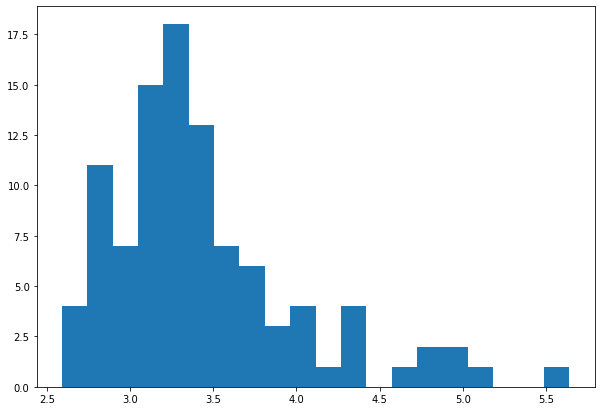

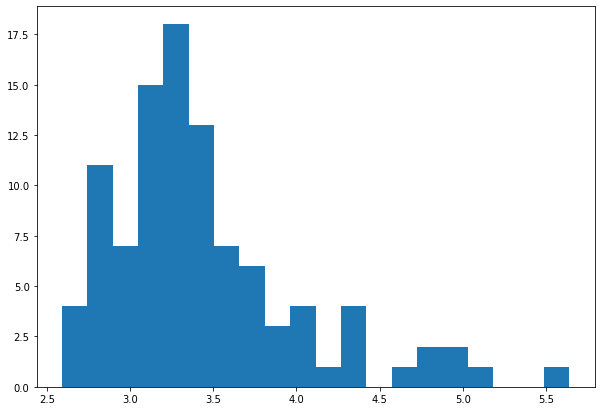

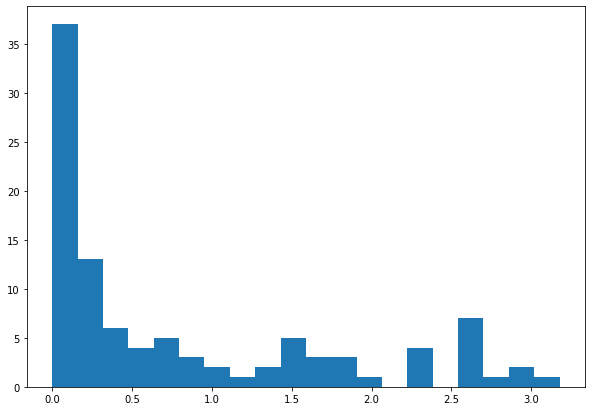

In [162]:

fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(max_std, bins = 20)
plt.savefig("top_std.pdf")
plt.show()

fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(kmeans_std, bins = 20)
plt.savefig("Kmeans_std.pdf")
plt.show()

fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(rand_std, bins = 20)
plt.savefig("random_std.pdf")
plt.show()